In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_theme(style="darkgrid")

In [2]:
df = pd.read_csv("../data/tokopedia_tws_f9.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2338 entries, 0 to 2337
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   rating   2338 non-null   object
 1   comment  2338 non-null   object
dtypes: object(2)
memory usage: 36.7+ KB


In [4]:
df["rating"] = df["rating"].apply(lambda x: int(x.split(" ")[1]))

In [5]:
df.head()

,rating,comment
0,5,bagus
1,3,1tidak menyala
2,5,puas brangnya sesusai
3,5,lumayan lah walaupun bass nya kurang
4,4,"barang udah sampai, packing bagus, barang mulu..."


In [6]:
df["rating"].value_counts()

rating
5    1743
4     279
3     136
1     123
2      57
Name: count, dtype: int64

In [7]:
df["sentiment"] = df["rating"].apply(
    lambda rate: (
        "positive" if rate in [4, 5] else "neutral" if rate == 3 else "negative"
    )
)

In [8]:
df["sentiment"].value_counts()

sentiment
positive    2022
negative     180
neutral      136
Name: count, dtype: int64

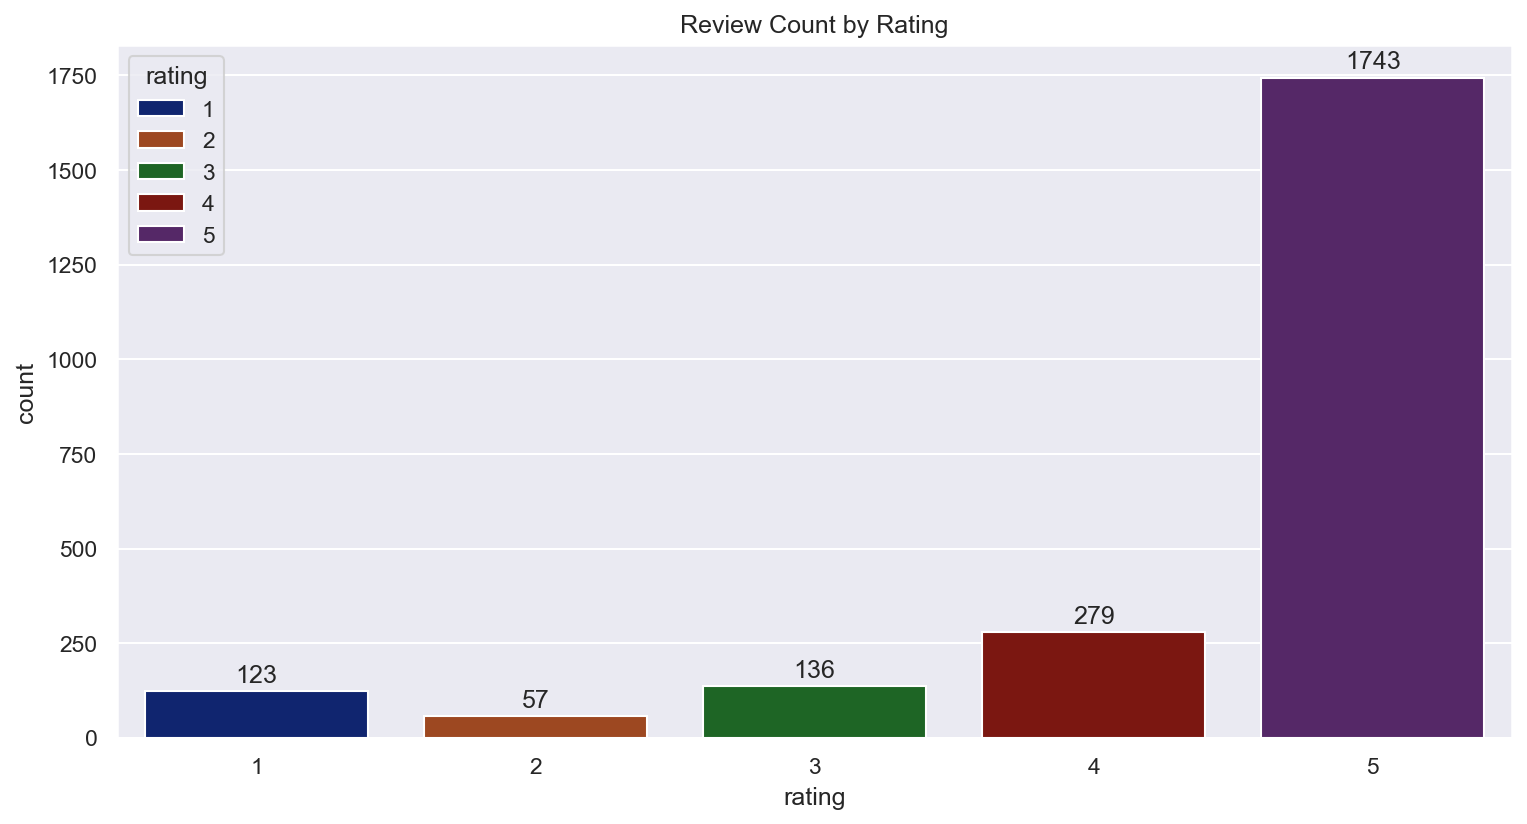

In [9]:
plt.figure(figsize=(12, 6), dpi=150)
plt.title("Review Count by Rating")
ax = sns.countplot(data=df, x="rating", hue="rating", palette="dark")
for i in ax.containers:
    ax.bar_label(i, padding=2)

[None, None, None, None, None]

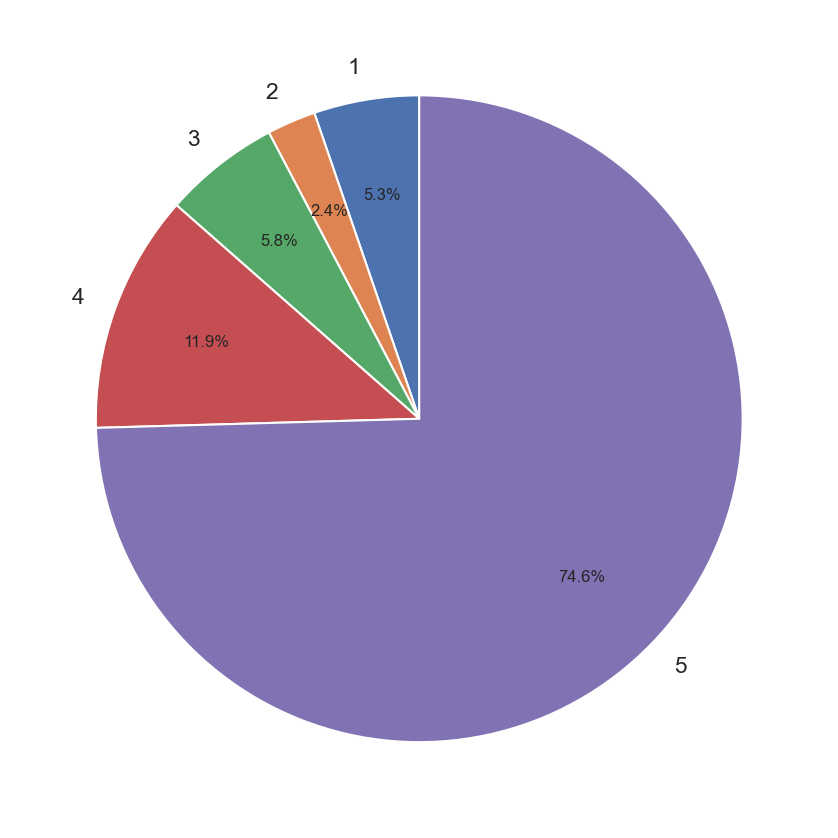

In [10]:
rating_count = (
    df.groupby("rating").agg({"rating": "count"}).rename({"rating": "count"}, axis=1)
)

plt.figure(figsize=(7, 7), dpi=150)
_, labels, autopct = plt.pie(
    rating_count["count"],
    labels=rating_count.index,
    autopct="%1.1f%%",
    pctdistance=0.7,
    startangle=90,
)
plt.setp(autopct, fontsize=8)

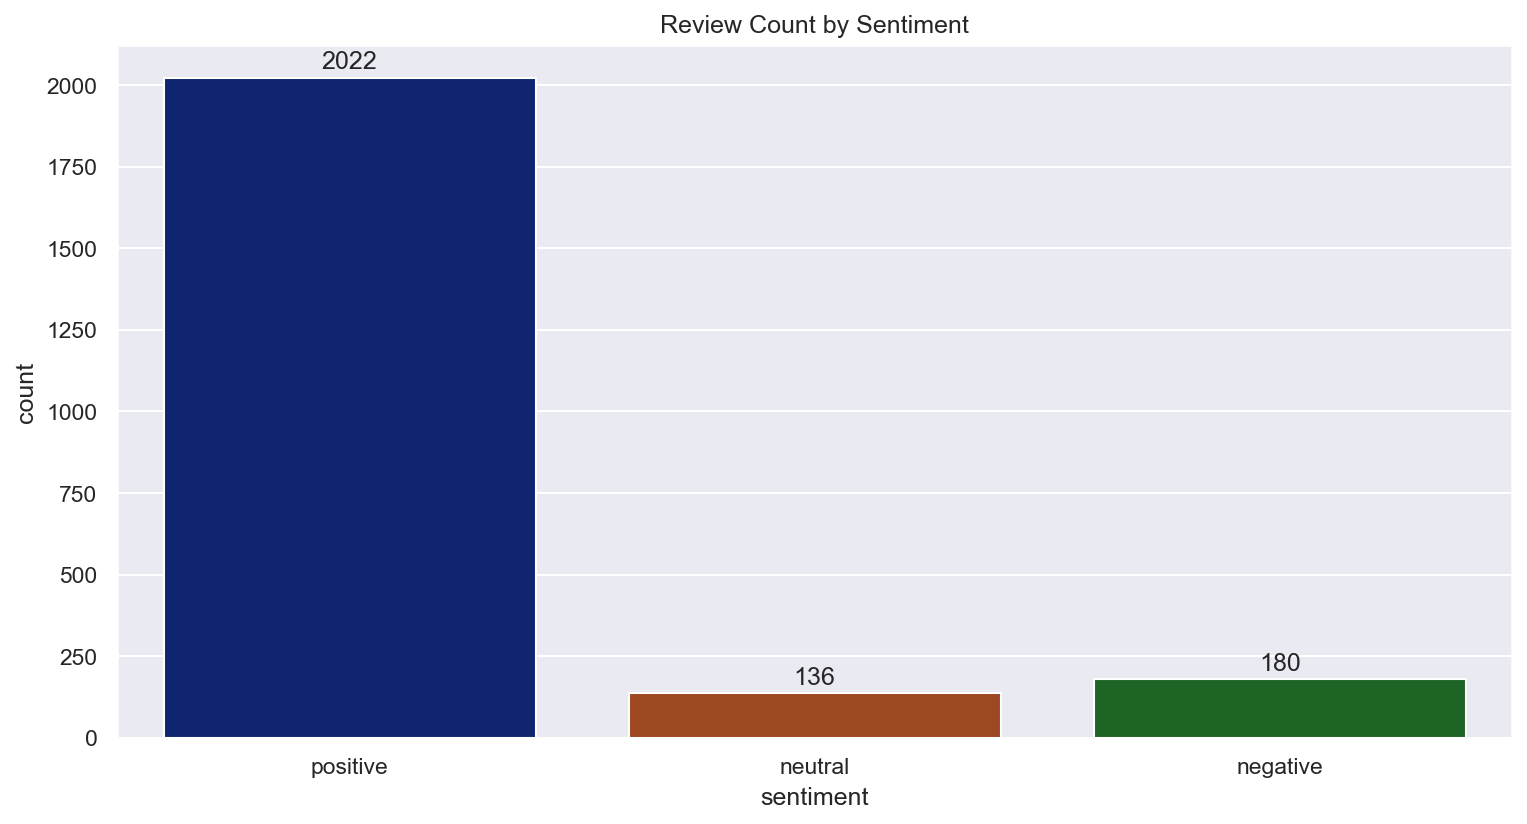

In [11]:
plt.figure(figsize=(12, 6), dpi=150)
plt.title("Review Count by Sentiment")
ax = sns.countplot(data=df, x="sentiment", hue="sentiment", palette="dark")
for i in ax.containers:
    ax.bar_label(i, padding=2)


In [12]:
df.to_csv("../data/tws-sentiment.csv", index=False)